In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
telco_churn = pd.read_csv('/home/amybirdee/hobby_projects/telco_customer_churn/Telco_Customer_Churn.csv', delimiter = ',')

In [4]:
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#no null rows so we don't need to fill an 'na' values
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
telco_churn.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,6954-OOYZZ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
#grouping by churn to see how many customers churn
churn = telco_churn.groupby('Churn').Churn.count()
churn

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

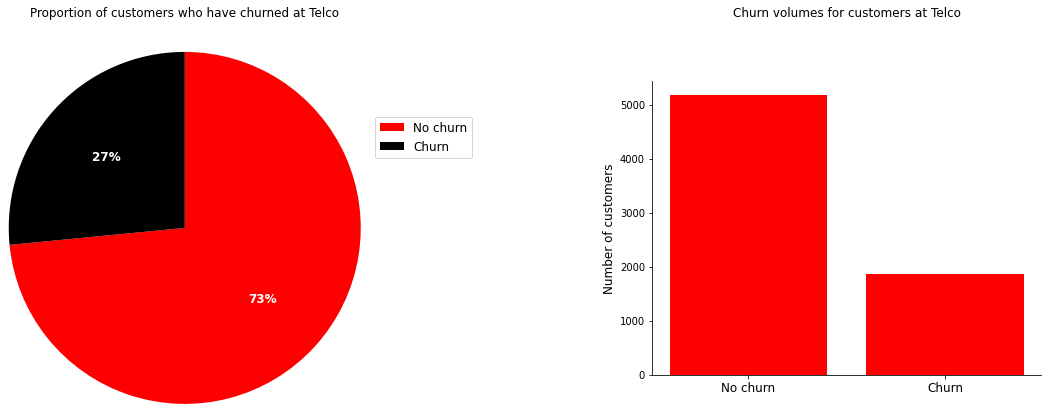

In [41]:
#creating charts to show churn at telco
churn_data = [5174, 1869]
churn_labels = ['No churn', 'Churn']

fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(1, 2, 1)    
_, _, autotexts = (plt.pie(churn_data, colors = ['red', 'black'], radius = 1.5, autopct = ('%.0f%%'), \
                           counterclock = False, startangle = -270))

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = churn_labels, loc = 'upper right', bbox_to_anchor = (1.5, 0.9), fontsize = 12)

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

#the y = 1.2 shifts the title up above the chart 
plt.title('Proportion of customers who have churned at Telco', y = 1.2, fontsize = 12)

ax = plt.subplot(1, 2, 2)
plt.bar(churn_labels, churn_data, color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(churn_labels, fontsize = 12)
plt.ylabel('Number of customers', fontsize = 12)
plt.title('Churn volumes for customers at Telco', fontsize = 12, y = 1.2)
plt.tight_layout()
plt.savefig('churn_proportions_and_volumes')

plt.subplots_adjust(wspace = 0.7)

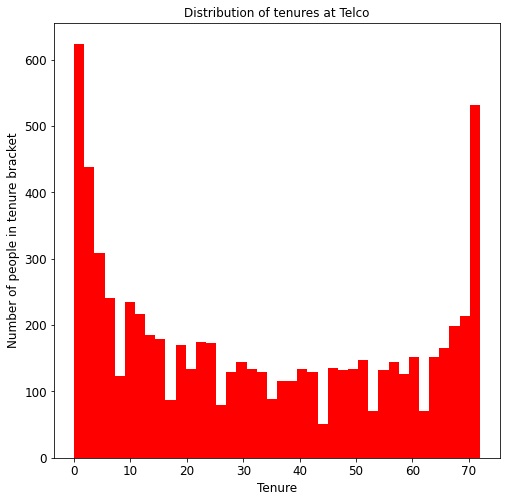

In [9]:
#checking the distribution of tenure - tenure is between 0 and 72 months
plt.figure(figsize = (8,8))
telco_churn['tenure'].hist(bins = 40, color = 'red')
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Number of people in tenure bracket', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Distribution of tenures at Telco', fontsize = 12)
plt.grid(None)
plt.savefig('Tenure - histogram', bbox_inches = 'tight')

In [10]:
#creating dataframe which includes just tenure and churn 
tenure = telco_churn[['tenure', 'Churn']]
tenure.head()

,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes


In [11]:
#grouping tenure into ranges to use in chart using pd.cut to cut the tenure column
bins = [-1, 9, 19, 29, 39, 49, 59, 69, np.inf]
labels = ['<10', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
tenure['tenure_bracket'] = pd.cut(tenure['tenure'], bins = bins, labels = labels)
tenure.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,tenure,Churn,tenure_bracket
0,1,No,<10
1,34,No,30-39
2,2,Yes,<10
3,45,No,40-49
4,2,Yes,<10


In [12]:
#creating pivot for chart
tenure_pivot = tenure.pivot_table(columns = 'Churn',
                                index = 'tenure_bracket',
                                aggfunc = 'size').reset_index()
tenure_pivot

Churn,tenure_bracket,No,Yes
0,<10,931,923
1,10-19,643,310
2,20-29,586,176
3,30-39,509,144
4,40-49,530,118
5,50-59,591,99
6,60-69,756,76
7,70+,628,23


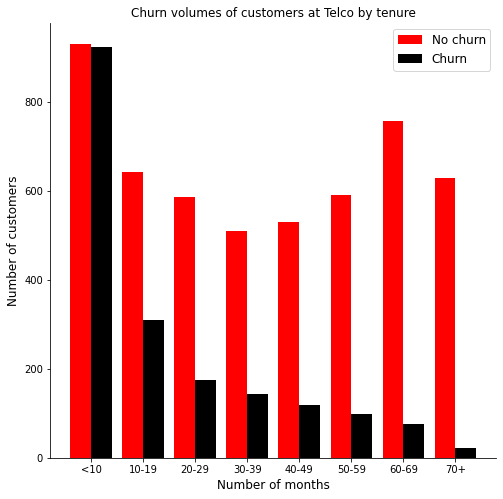

In [13]:
#plotting chart
num_bars = 8
width = 0.4

tenure_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(tenure_bars, tenure_pivot.No, width, color = 'red', label = 'No churn')
bar_2 = ax.bar(tenure_bars + width, tenure_pivot.Yes, width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Number of months', fontsize = 12)
ax.set_xticks(tenure_bars + width / 2)
ax.set_xticklabels(tenure_pivot.tenure_bracket)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers at Telco by tenure', fontsize = 12)
plt.savefig('churn_by_tenure')

In [14]:
#creating dataframe which includes just monthly charges and churn 
monthly_charges = telco_churn[['MonthlyCharges', 'Churn']]
monthly_charges.head()

,MonthlyCharges,Churn
0,29.85,No
1,56.95,No
2,53.85,Yes
3,42.30,No
4,70.70,Yes


In [15]:
#grouping monthly charges into ranges to use in chart charges range from $18.3 to $118.8
bins = [0, 19.99, 39.99, 59.99, 79.99, 99.99, np.inf]
labels = ['<20', '20-39', '40-59', '60-79', '80-99', '100+']
monthly_charges['charges_bracket'] = pd.cut(monthly_charges['MonthlyCharges'], bins = bins, labels = labels)
monthly_charges.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,MonthlyCharges,Churn,charges_bracket
0,29.85,No,20-39
1,56.95,No,40-59
2,53.85,Yes,40-59
3,42.30,No,40-59
4,70.70,Yes,60-79


In [16]:
#creating pivot for chart
charges_pivot = monthly_charges.pivot_table(columns = 'Churn',
                                index = 'charges_bracket',
                                aggfunc = 'size').reset_index()
charges_pivot

Churn,charges_bracket,No,Yes
0,<20,558,55
1,20-39,1066,158
2,40-59,794,276
3,60-79,989,470
4,80-99,1116,653
5,100+,651,257


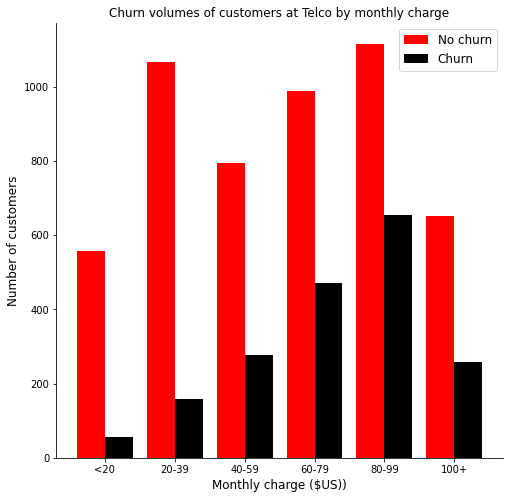

In [17]:
#plotting chart
num_bars = 6
width = 0.4

charges_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(charges_bars, charges_pivot.No, width, color = 'red', label = 'No churn')
bar_2 = ax.bar(charges_bars + width, charges_pivot.Yes, width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Monthly charge ($US))', fontsize = 12)
ax.set_xticks(charges_bars + width / 2)
ax.set_xticklabels(charges_pivot.charges_bracket)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers at Telco by monthly charge', fontsize = 12)
plt.savefig('churn_by_monthly_charge')

In [18]:
#merging tenure and monthly_charges dataframes by index
tenure_charges = pd.merge(tenure, monthly_charges, left_index = True, right_index = True, how = 'outer')
tenure_charges.head()

,tenure,Churn_x,tenure_bracket,MonthlyCharges,Churn_y,charges_bracket
0,1,No,<10,29.85,No,20-39
1,34,No,30-39,56.95,No,40-59
2,2,Yes,<10,53.85,Yes,40-59
3,45,No,40-49,42.30,No,40-59
4,2,Yes,<10,70.70,Yes,60-79


In [19]:
#creating pivot for chart
tenure_charges_pivot = tenure_charges.pivot_table(columns = 'Churn_x',
                                index = 'tenure_bracket',
                                values = 'MonthlyCharges').reset_index()
tenure_charges_pivot

Churn_x,tenure_bracket,No,Yes
0,<10,46.423845,65.164518
1,10-19,51.380638,77.440161
2,20-29,56.458276,82.151136
3,30-39,61.982417,83.352778
4,40-49,63.472830,86.640254
5,50-59,66.919036,87.861111
6,60-69,71.817659,96.950000
7,70+,77.404299,96.789130


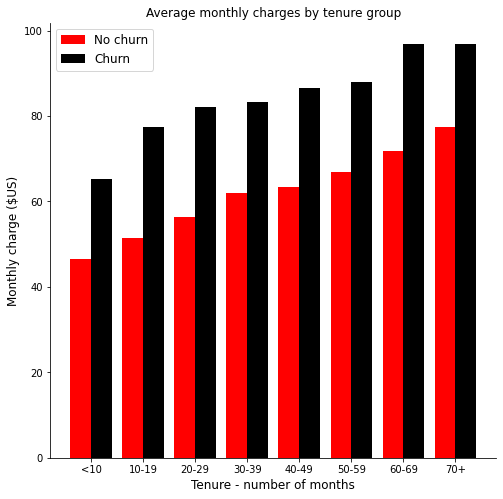

In [54]:
#plotting chart
num_bars = 8
width = 0.4

tenure_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(tenure_bars, tenure_charges_pivot.No, width, color = 'red', label = 'No churn')
bar_2 = ax.bar(tenure_bars + width, tenure_charges_pivot.Yes, width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Monthly charge ($US)', fontsize = 12)
ax.set_xlabel('Tenure - number of months', fontsize = 12)
ax.set_xticks(tenure_bars + width / 2)
ax.set_xticklabels(tenure_charges_pivot.tenure_bracket)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper left', fontsize = 12)
ax.set_title('Average monthly charges by tenure group', fontsize = 12)
plt.savefig('churn_by_tenure_and_charge')

In [21]:
#creating dataframe which includes just age and churn - 0 = non-senior citizen, 1 = senior citizen
senior = telco_churn[['SeniorCitizen', 'Churn']]
senior.head()

,SeniorCitizen,Churn
0,0,No
1,0,No
2,0,Yes
3,0,No
4,0,Yes


In [22]:
#grouping dataframe to see total numbers. 0 = non-senior, 1 = senior citizen 
senior = senior.groupby(['SeniorCitizen', 'Churn']).size().to_frame().reset_index().rename(columns = {0: 'count_churn'})
senior

,SeniorCitizen,Churn,count_churn
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


In [23]:
#creating pivot for chart
senior_pivot = senior.pivot_table(columns = 'Churn',
                                index = 'SeniorCitizen',
                                values = 'count_churn').reset_index()
senior_pivot

Churn,SeniorCitizen,No,Yes
0,0,4508,1393
1,1,666,476


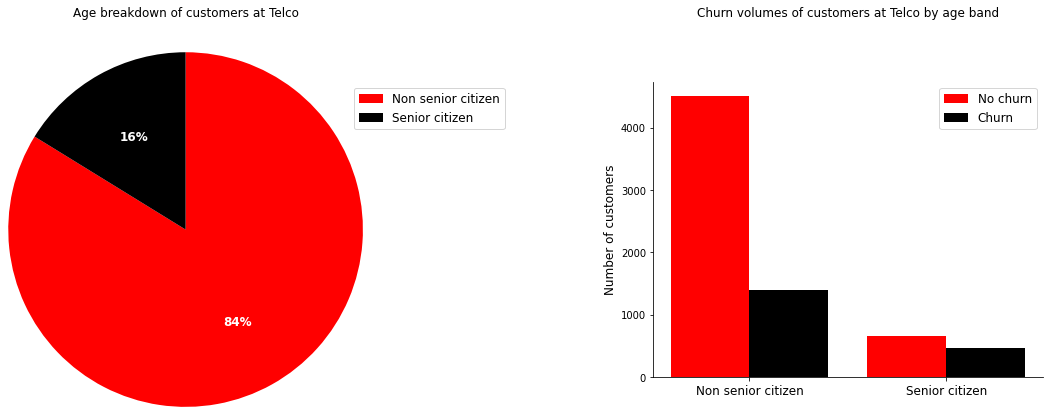

In [45]:
#creating charts to show churn by age at telco
churn_data = [5901, 1142]
churn_labels = ['Non senior citizen', 'Senior citizen']

fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(1, 2, 1)    
_, _, autotexts = (plt.pie(churn_data, colors = ['red', 'black'], radius = 1.5, autopct = ('%.0f%%'), \
                           counterclock = False, startangle = -270))

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = churn_labels, loc = 'upper right', bbox_to_anchor = (1.6, 1.0), fontsize = 12)

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

#the y = 1.2 shifts the title up above the chart 
plt.title('Age breakdown of customers at Telco', y = 1.2, fontsize = 12)

#second subplot
ax = plt.subplot(1, 2, 2)
num_bars = 2
width = 0.4

age_bars = np.arange(num_bars)

bar_1 = ax.bar(age_bars, senior_pivot.No, width, color = 'red', label = 'No churn')
bar_2 = ax.bar(age_bars + width, senior_pivot.Yes, width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
ax.set_xticks(age_bars + width / 2)
ax.set_xticklabels(['Non senior citizen', 'Senior citizen'], fontsize = 12)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers at Telco by age band',y = 1.2, fontsize = 12)
plt.tight_layout()
plt.savefig('churn_by_age')

plt.subplots_adjust(wspace = 0.7)

In [25]:
#creating dataframe which includes partner and churn
partner = telco_churn[['Partner', 'Churn']]
partner.head()

,Partner,Churn
0,Yes,No
1,No,No
2,No,Yes
3,No,No
4,No,Yes


In [26]:
#grouping dataframe to see total numbers
partner = partner.groupby(['Partner', 'Churn']).size().to_frame().reset_index().rename(columns = {0: 'count_churn'})
partner

,Partner,Churn,count_churn
0,No,No,2441
1,No,Yes,1200
2,Yes,No,2733
3,Yes,Yes,669


In [27]:
#creating pivot for chart
partner_pivot = partner.pivot_table(columns = 'Churn',
                                index = 'Partner',
                                values = 'count_churn').reset_index()
partner_pivot

Churn,Partner,No,Yes
0,No,2441,1200
1,Yes,2733,669


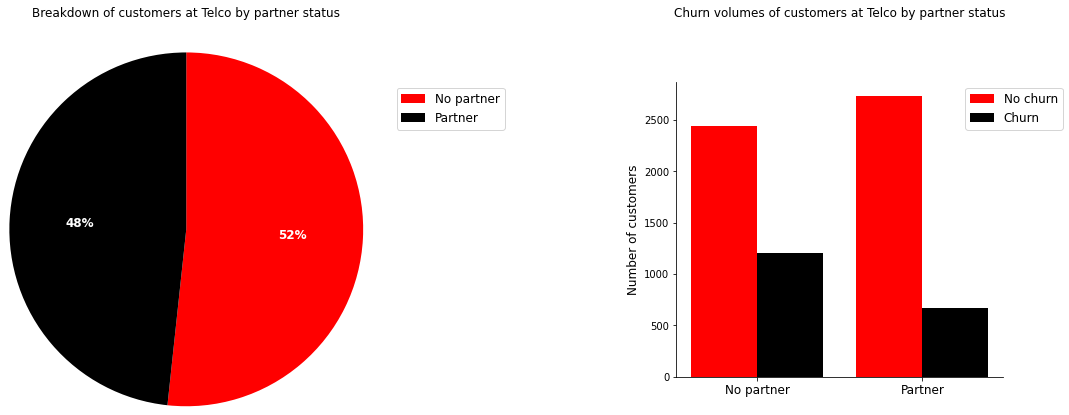

In [47]:
#creating charts to show churn by partner at telco
churn_data = [3641, 3402]
churn_labels = ['No partner', 'Partner']

fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(1, 2, 1)    
_, _, autotexts = (plt.pie(churn_data, colors = ['red', 'black'], radius = 1.5, autopct = ('%.0f%%'), \
                           counterclock = False, startangle = -270))

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = churn_labels, loc = 'upper right', bbox_to_anchor = (1.6, 1.0), fontsize = 12)

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

#the y = 1.2 shifts the title up above the chart 
plt.title('Breakdown of customers at Telco by partner status', y = 1.2, fontsize = 12)

#second subplot
ax = plt.subplot(1, 2, 2)
num_bars = 2
width = 0.4

partner_bars = np.arange(num_bars)

bar_1 = ax.bar(partner_bars, partner_pivot.No, width, color = 'red', label = 'No churn')
bar_2 = ax.bar(partner_bars + width, partner_pivot.Yes, width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
ax.set_xticks(partner_bars + width / 2)
ax.set_xticklabels(['No partner', 'Partner'], fontsize = 12)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12, bbox_to_anchor = (1.2, 1.0))
ax.set_title('Churn volumes of customers at Telco by partner status', y = 1.2, fontsize = 12)
plt.tight_layout()
plt.savefig('churn_by_partner')

plt.subplots_adjust(wspace = 1.0)

In [29]:
#creating dataframe which includes dependents and churn
dependents = telco_churn[['Dependents', 'Churn']]
dependents.head()

,Dependents,Churn
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,Yes


In [30]:
#grouping dataframe to see total numbers
dependents = dependents.groupby(['Dependents', 'Churn']).size().to_frame().reset_index().rename(columns = {0: 'count_churn'})
dependents

,Dependents,Churn,count_churn
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


In [31]:
#creating pivot for chart
dependents_pivot = dependents.pivot_table(columns = 'Churn',
                                index = 'Dependents',
                                values = 'count_churn').reset_index()
dependents_pivot

Churn,Dependents,No,Yes
0,No,3390,1543
1,Yes,1784,326


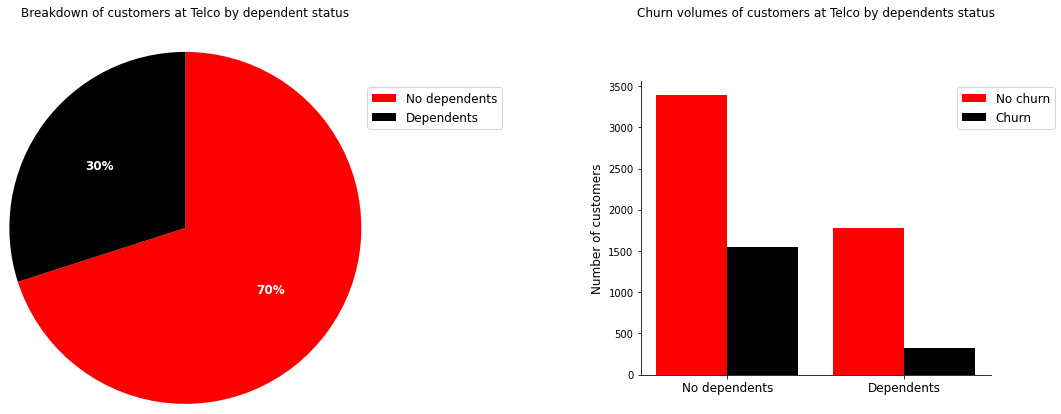

In [51]:
#creating charts to show churn by dependents at telco
churn_data = [4933, 2110]
churn_labels = ['No dependents', 'Dependents']

fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(1, 2, 1)    
_, _, autotexts = (plt.pie(churn_data, colors = ['red', 'black'], radius = 1.5, autopct = ('%.0f%%'), \
                           counterclock = False, startangle = -270))

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = churn_labels, loc = 'upper right', bbox_to_anchor = (1.6, 1.0), fontsize = 12)

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

#the y = 1.2 shifts the title up above the chart 
plt.title('Breakdown of customers at Telco by dependent status', y = 1.2, fontsize = 12)

#second subplot
ax = plt.subplot(1, 2, 2)
num_bars = 2
width = 0.4

dependents_bars = np.arange(num_bars)

bar_1 = ax.bar(dependents_bars, dependents_pivot.No, width, color = 'red', label = 'No churn')
bar_2 = ax.bar(dependents_bars + width, dependents_pivot.Yes, width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
ax.set_xticks(partner_bars + width / 2)
ax.set_xticklabels(['No dependents', 'Dependents'], fontsize = 12)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12, bbox_to_anchor = (1.2, 1.0))
ax.set_title('Churn volumes of customers at Telco by dependents status',y = 1.2, fontsize = 12)
plt.tight_layout()
plt.savefig('churn_by_dependents')

plt.subplots_adjust(wspace = 0.8)

In [33]:
#creating dataframe which includes contract type and churn
contract= telco_churn[['Contract', 'Churn']]
contract.head()

,Contract,Churn
0,Month-to-month,No
1,One year,No
2,Month-to-month,Yes
3,One year,No
4,Month-to-month,Yes


In [34]:
#grouping dataframe to see total numbers
contract = contract.groupby(['Contract', 'Churn']).size().to_frame().reset_index().rename(columns = {0: 'count_churn'})
contract

,Contract,Churn,count_churn
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


In [35]:
#creating pivot for chart
contract_pivot = contract.pivot_table(columns = 'Churn',
                                index = 'Contract',
                                values = 'count_churn').reset_index()
contract_pivot

Churn,Contract,No,Yes
0,Month-to-month,2220,1655
1,One year,1307,166
2,Two year,1647,48


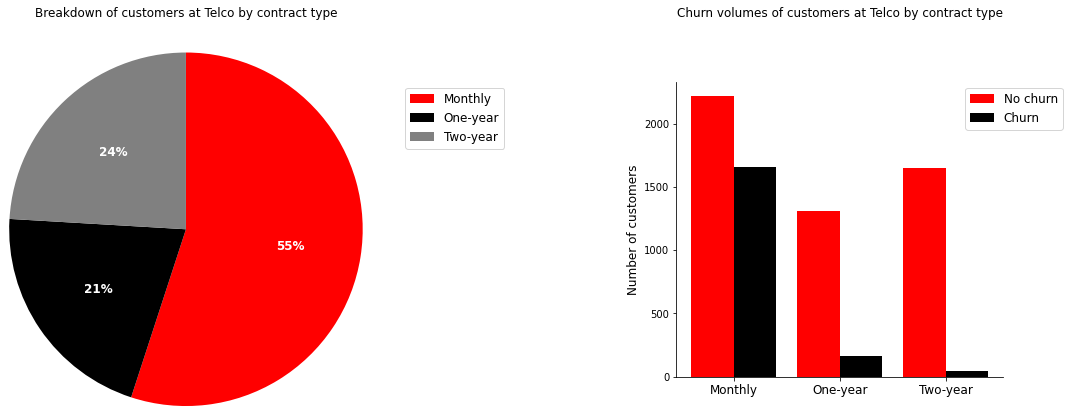

In [53]:
#creating charts to show churn by contract type at telco
churn_data = [3875, 1473, 1695]
churn_labels = ['Monthly', 'One-year', 'Two-year']

fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(1, 2, 1)    
_, _, autotexts = (plt.pie(churn_data, colors = ['red', 'black', 'grey'], radius = 1.5, autopct = ('%.0f%%'), \
                           counterclock = False, startangle = -270))

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = churn_labels, loc = 'upper right', bbox_to_anchor = (1.6, 1.0), fontsize = 12)

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

#the y = 1.2 shifts the title up above the chart 
plt.title('Breakdown of customers at Telco by contract type', y = 1.2, fontsize = 12)

#second subplot
ax = plt.subplot(1, 2, 2)
num_bars = 3
width = 0.4

contract_bars = np.arange(num_bars)

bar_1 = ax.bar(contract_bars, contract_pivot.No, width, color = 'red', label = 'No churn')
bar_2 = ax.bar(contract_bars + width, contract_pivot.Yes, width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
ax.set_xticks(contract_bars + width / 2)
ax.set_xticklabels(['Monthly', 'One-year', 'Two-year'], fontsize = 12)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12, bbox_to_anchor = (1.2, 1.0))
ax.set_title('Churn volumes of customers at Telco by contract type',y = 1.2, fontsize = 12)
plt.tight_layout()
plt.savefig('churn_by_contract')

plt.subplots_adjust(wspace = 1.0)